In [1]:
import astropy.units as u
import matplotlib.pyplot as plt

import pint.fitter
from pint.models import get_model_and_toas
from pint.models.spindown import Spindown
from pint.residuals import Residuals
import pint.logging
from pint.models import (
    parameter as p,
)

pint.logging.setup(level="INFO")

1

In [2]:
parfile= "J1709-4429.par"
timfile= "J1709-4429.tim"

m, t_all = get_model_and_toas(parfile, timfile)
m

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\model_builder.py:198 UserWarning: Unrecognized parfile line 'EPHVER 5'
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\model_builder.py:198 UserWarning: Unrecognized parfile line 'TNGLOBALEF 0.932668'
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\model_builder.py:198 UserWarning: Unrecognized parfile line 'TNGLOBALEQ -3.37633'
INFO     (pint.toa                      ): Using CLOCK = TT(TAI), so setting include_bipm = False
INFO     (pint.observatory              ): Applying GPS to UTC clock correction (~few nanoseconds)
INFO     (pint.observatory              ): Loading global GPS clock file
INFO     (pint.observatory              ): Using global clock file for gps2utc.clk with bogus_last_correction=False
INFO     (pint.observatory              ): Using global clock file for mo2gps.clk with bogus_last_correction=True
INFO

TimingModel(
  AbsPhase(
    MJDParameter(   TZRMJD              57778.8453682432610186 (d) frozen=True),
    strParameter(   TZRSITE             mo                frozen=True),
    floatParameter( TZRFRQ              835.062012        (MHz) frozen=True)),
  AstrometryEquatorial(
    MJDParameter(   POSEPOCH            57600.0000000000000000 (d) frozen=True),
    floatParameter( PX                  0.0               (mas) frozen=True),
    AngleParameter( RAJ                 17:09:42.62494630 (hourangle) +/- 0h00m00.051919s frozen=False),
    AngleParameter( DECJ                -44:29:12.95895000 (deg) +/- 0d00m01.2382s frozen=False),
    floatParameter( PMRA                0.0               (mas / yr) frozen=True),
    floatParameter( PMDEC               0.0               (mas / yr) frozen=True)),
  DispersionDM(
    floatParameter( DM                  75.69             (pc / cm3) frozen=True),
    floatParameter( DM1                 UNSET,
    MJDParameter(   DMEPOCH             5760

In [3]:
display(m.components["Spindown"].params)

['F0', 'PEPOCH', 'F1']

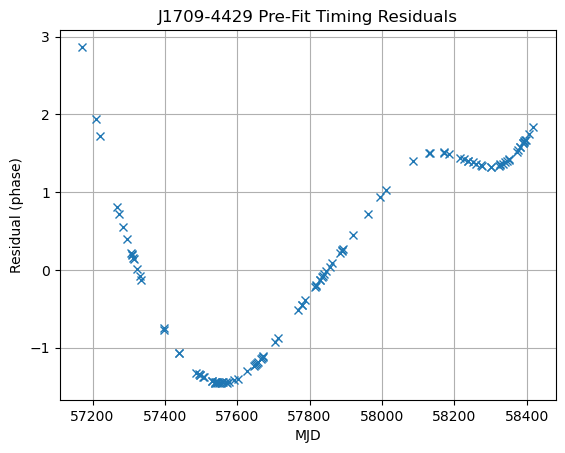

In [4]:
rs = Residuals(t_all, m).phase_resids
xt = t_all.get_mjds()
plt.figure()
plt.plot(xt, rs, "x")
plt.title(f"{m.PSR.value} Pre-Fit Timing Residuals")
plt.xlabel("MJD")
plt.ylabel("Residual (phase)")
plt.grid()

In [5]:
t_all.print_summary()

Number of TOAs:  114
Number of commands:  2
Number of observatories: 1 ['most']
MJD span:  57171.607 to 58418.203
Date span: 2015-05-29 14:34:14.982631331 to 2018-10-27 04:51:49.845290701
most TOAs (114):
  Min freq:      833.739 MHz
  Max freq:      840.233 MHz
  Min error:     51.5 us
  Max error:     1.27e+03 us
  Median error:  161 us



In [6]:
error_ok = t_all.table["error"] <= 100000* u.us
t = t_all[error_ok]
t.print_summary()



Number of TOAs:  114
Number of commands:  2
Number of observatories: 1 ['most']
MJD span:  57171.607 to 58418.203
Date span: 2015-05-29 14:34:14.982631331 to 2018-10-27 04:51:49.845290701
most TOAs (114):
  Min freq:      833.739 MHz
  Max freq:      840.233 MHz
  Min error:     51.5 us
  Max error:     1.27e+03 us
  Median error:  161 us



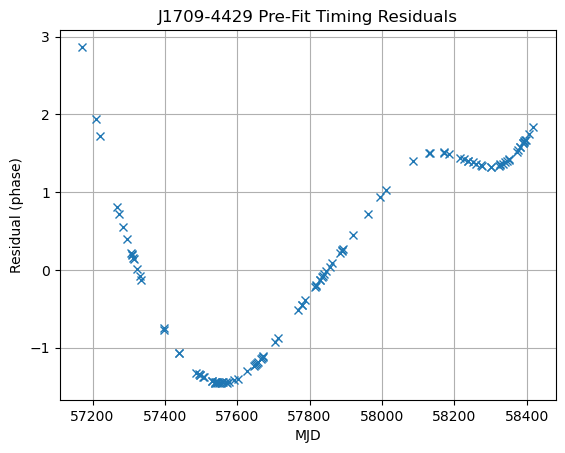

In [7]:
rs = Residuals(t, m).phase_resids
xt = t.get_mjds()
plt.figure()
plt.plot(xt, rs, "x")
plt.title(f"{m.PSR.value} Pre-Fit Timing Residuals")
plt.xlabel("MJD")
plt.ylabel("Residual (phase)")
plt.grid()

In [8]:
f = pint.fitter.DownhillGLSFitter(t, m)
f.fit_toas()

True

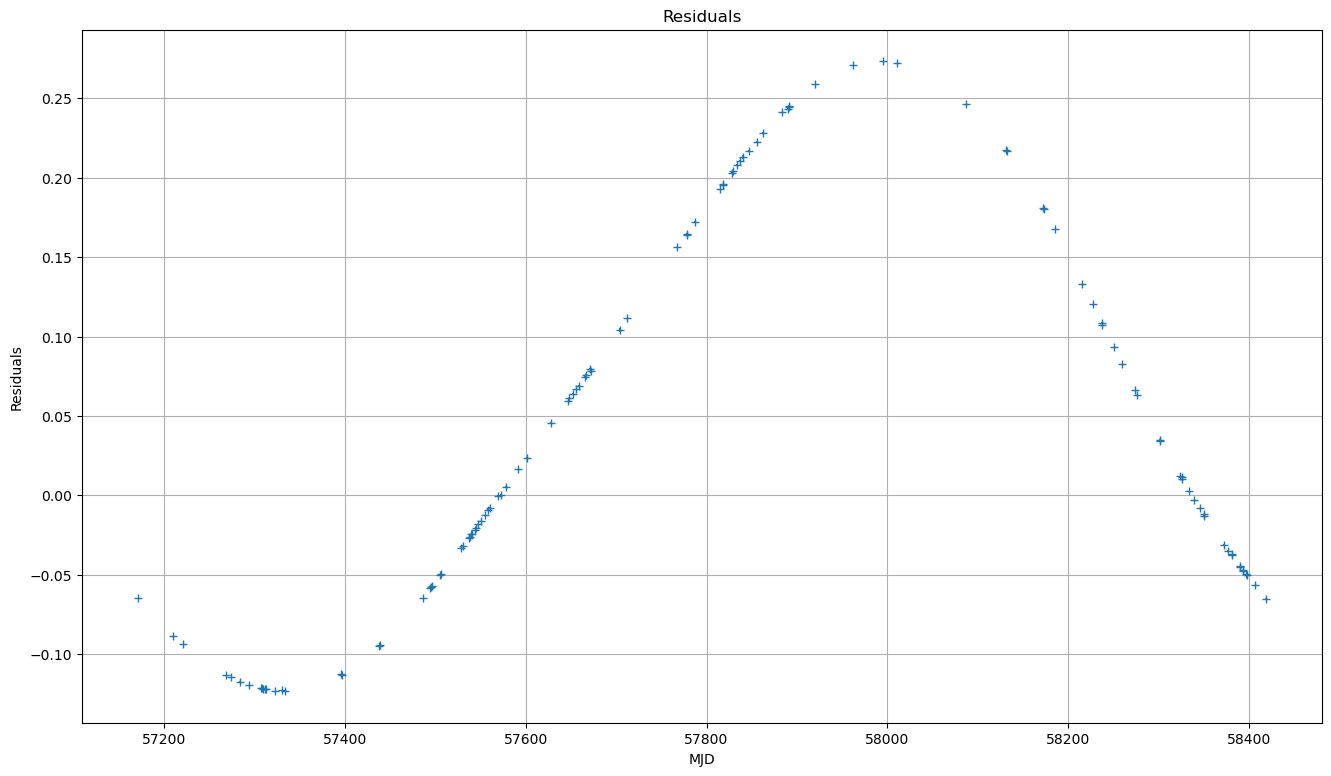

In [9]:
f.plot()

In [10]:
f.print_summary()


Fitted model using downhill_gls method with 9 free parameters to 114 TOAs
Prefit residuals Wrms = 140178.8173310454 us, Postfit residuals Wrms = 95770.43735844792 us
Chisq = 789.835 for 104 d.o.f. for reduced Chisq of 7.595

PAR                   Prefit                  Postfit            Units
============== ==================== ============================ =====
PSR                      J1709-4429 J1709-4429                   None
TRACK                            -2 -2                           None
EPHEM                         DE430 DE430                        None
CLOCK                       TT(TAI) TT(TAI)                      None
UNITS                           TDB TDB                          None
START                       57171.6                      57171.6 d 
FINISH                      58393.3                      58418.2 d 
DILATEFREQ                        N                              None
DMDATA                            N                              None
NTOA   

In [11]:
nu1=9.7542900447
nu2=9.754290000
nudot1=-8.85391e-12
nudot2=-8.8466e-12
dt_days=(58418.2+57787.8)/2-(57767.9+57171.6)/2
dt=dt_days*24*60*60

In [12]:
n=1+(nu1*nudot2-nu2*nudot1)/(nudot1*nudot2*dt)
print(n)

17.63834773344862


In [13]:
f2 = p.prefixParameter(
    parameter_type="float",
    name="F2",
    value=0.0,
    units=u.Hz / (u.s) ** 2,
    longdouble=True,
)

In [14]:
m.components["Spindown"].add_param(f2, setup=True)


In [15]:
m.F2.quantity = 2e-20 * u.Hz / u.s**2
m.F2.frozen= False

In [16]:
m.validate()

m

TimingModel(
  AbsPhase(
    MJDParameter(   TZRMJD              57778.8453682432610186 (d) frozen=True),
    strParameter(   TZRSITE             mo                frozen=True),
    floatParameter( TZRFRQ              835.062012        (MHz) frozen=True)),
  AstrometryEquatorial(
    MJDParameter(   POSEPOCH            57600.0000000000000000 (d) frozen=True),
    floatParameter( PX                  0.0               (mas) frozen=True),
    AngleParameter( RAJ                 17:09:42.62494630 (hourangle) +/- 0h00m00.051919s frozen=False),
    AngleParameter( DECJ                -44:29:12.95895000 (deg) +/- 0d00m01.2382s frozen=False),
    floatParameter( PMRA                0.0               (mas / yr) frozen=True),
    floatParameter( PMDEC               0.0               (mas / yr) frozen=True)),
  DispersionDM(
    floatParameter( DM                  75.69             (pc / cm3) frozen=True),
    floatParameter( DM1                 UNSET,
    MJDParameter(   DMEPOCH             5760

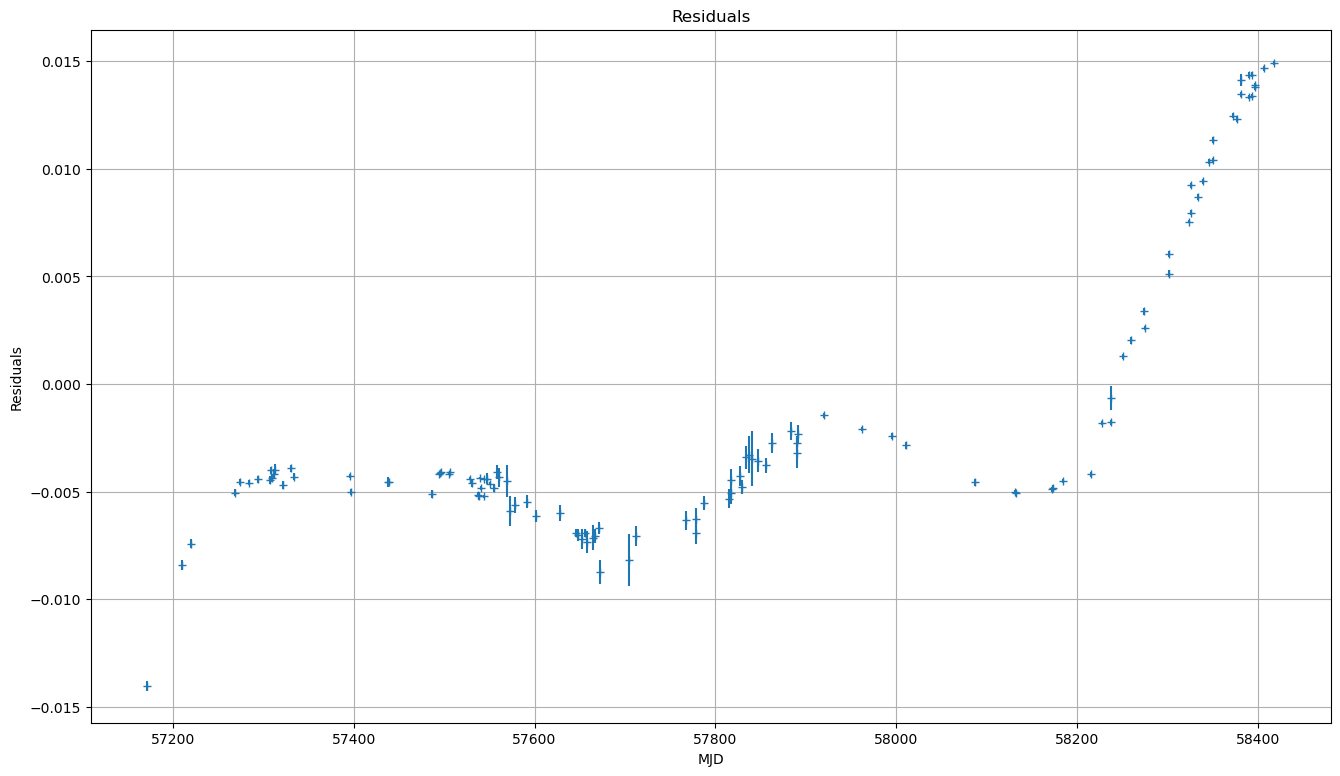

In [17]:
f3 = pint.fitter.WLSFitter(t, m)
f3.fit_toas()
f3.plot()

In [18]:
f3.print_summary()

Fitted model using weighted_least_square method with 10 free parameters to 114 TOAs
Prefit residuals Wrms = 44088008.252432525 us, Postfit residuals Wrms = 7151.866607810597 us
Chisq = 17192.519 for 103 d.o.f. for reduced Chisq of 166.918

PAR                   Prefit                  Postfit            Units
============== ==================== ============================ =====
PSR                      J1709-4429 J1709-4429                   None
TRACK                            -2 -2                           None
EPHEM                         DE430 DE430                        None
CLOCK                       TT(TAI) TT(TAI)                      None
UNITS                           TDB TDB                          None
START                       57171.6                      57171.6 d 
FINISH                      58393.3                      58418.2 d 
DILATEFREQ                        N                              None
DMDATA                            N                           

In [19]:
n=( 9.754290029791)*(2.2419e-22)/(8.8517127e-12**2)
print(n)

27.909835859385982


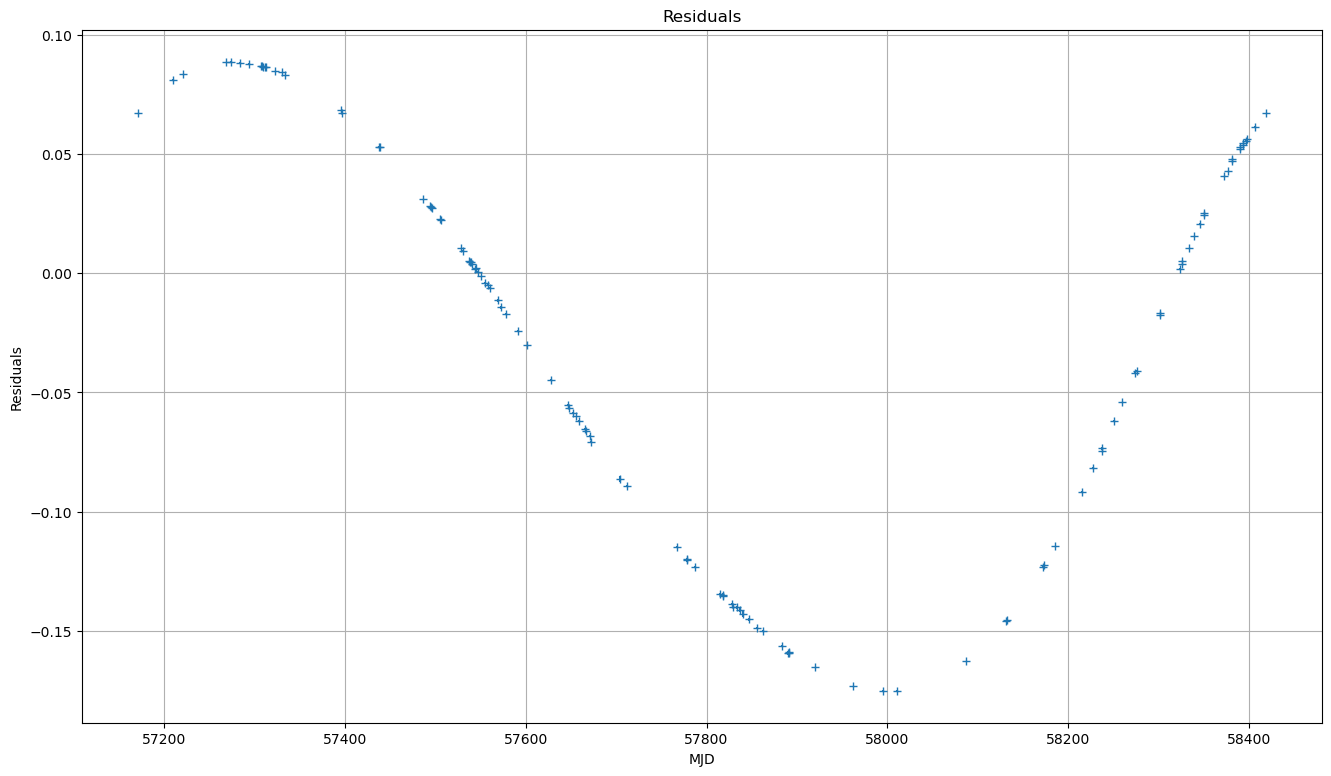

In [20]:
f4 = pint.fitter.DownhillGLSFitter(t, m)
f4.fit_toas()
f4.plot()